# Testing Predictions of the variants of MILD

In [1]:
%matplotlib widget
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

import torch
import os

from mild_hri.utils import *
from mild_hri.dataloaders import *


os.environ['CUDA_VISIBLE_DEVICES'] = '0'

model_types = [('', 399)]

# model_types = [('nuisiv2_3joints_xvel', 180)]
# model_types = [('bp_hh_20hz_3joints_xvel', 399)]
# model_types = [
# 	('nuisiv2_pepper_3joints_xvel_old/v1_1', 399),
# 	('nuisiv2_pepper_3joints_xvel_old/v2_1', 399),
# 	('nuisiv2_pepper_3joints_xvel_old/v2_2', 399),
# 	('nuisiv2_pepper_3joints_xvel_old/v3_1', 399),
# 	('nuisiv2_pepper_3joints_xvel_old/v3_2', 399),
# ]
# model_types = [
# 	('bp_yumi_20hz_3joints_xvel/v1_1', 399),
# 	('bp_yumi_20hz_3joints_xvel/v2_1', 399),
# 	('bp_yumi_20hz_3joints_xvel/v2_2', 399),
# 	('bp_yumi_20hz_3joints_xvel/v3_1', 399),
# 	('bp_yumi_20hz_3joints_xvel/v3_2', 399),
# ]
# model_types = [
# 	('bp_pepper_20hz_3joints_xvel_old/v1_1', 190),
# 	('bp_pepper_20hz_3joints_xvel_old/v2_1', 190),
# 	('bp_pepper_20hz_3joints_xvel_old/v2_2', 190),
# 	('bp_pepper_20hz_3joints_xvel_old/v3_1', 190),
# 	('bp_pepper_20hz_3joints_xvel_old/v3_2', 190),
# ] 

print('Model\tPred. MSE waving\t\tPred. MSE handshake\t\tPred. MSE rocket\t\tPred. MSE parachute')
print('\t\tmean\tsigma\tmean\tsigma\tmean\tsigma\tmean\tsigma')
pred_mse_action = []
pred_mse_best = []

for model_type,epoch in model_types:
	pred_mse_k = []
	pred_mse_action_k = [[],[],[],[]]
	best_action_mse = [1000,1000,1000,1000]
	for trial in range(4):
		# ckpt_path = f'../logs/2023/{model_type}/z5h6/trial{trial}/models/' + '%0.3d'%epoch + '.pth'
		ckpt_path = f'../logs/alap_hh/trial{trial}/models/' + '%0.3d'%epoch + '.pth'
		ckpt = torch.load(ckpt_path)
		if 'args' in ckpt.keys():
			pred_mse_ckpt, pred_mse_action_ckpt, pred_mse_nowave_ckpt = evaluate_ckpt_hh(ckpt_path)
		else:
			pred_mse_ckpt, pred_mse_action_ckpt, pred_mse_nowave_ckpt = evaluate_ckpt_hr(ckpt_path)

		if np.any(np.isnan(pred_mse_ckpt)):
			print(model_type, trial)
			continue
		pred_mse_k += pred_mse_ckpt
		# s = f'{model_type}\t{epoch}\t{trial}\t'
		for i in range(len(pred_mse_action_ckpt)):
			if best_action_mse[i] > np.mean(pred_mse_action_ckpt[i]):
				pred_mse_action_k[i] = pred_mse_action_ckpt[i]
				best_action_mse[i] = np.mean(pred_mse_action_ckpt[i])
			# s += f'\t{np.mean(pred_mse_action_ckpt[i]):.3f} $\pm$ {np.std(pred_mse_action_ckpt[i]):.3f}'
		# print(s)
	s = f'{model_type}\t'
	for i in range(len(pred_mse_action_k)):
		if len(pred_mse_action_k[i])==0:
			continue
		s += f'\t{np.mean(pred_mse_action_k[i])*100:.3f} $\pm$ {np.std(pred_mse_action_k[i])*100:.3f}'
	print(s)
	# print('')
	pred_mse_action.append(pred_mse_action_k)
np.savez_compressed('../logs/mse/alap_hh.npz', np.array(pred_mse_action,dtype=object))
	# print('\n')


Model	Pred. MSE waving		Pred. MSE handshake		Pred. MSE rocket		Pred. MSE parachute
		mean	sigma	mean	sigma	mean	sigma	mean	sigma
		0.869 $\pm$ 0.964	0.441 $\pm$ 0.280


In [2]:
pred_mse = np.array(pred_mse_action,dtype=object)
# print(len(pred_mse), len(pred_mse[0]), len(pred_mse[1]), len(pred_mse[2]), len(pred_mse[3]), len(pred_mse[4]))
print(len(pred_mse[0][0]), len(pred_mse[0][1]), len(pred_mse[0][2]), len(pred_mse[0][3]))

673 632 0 0


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (0,).

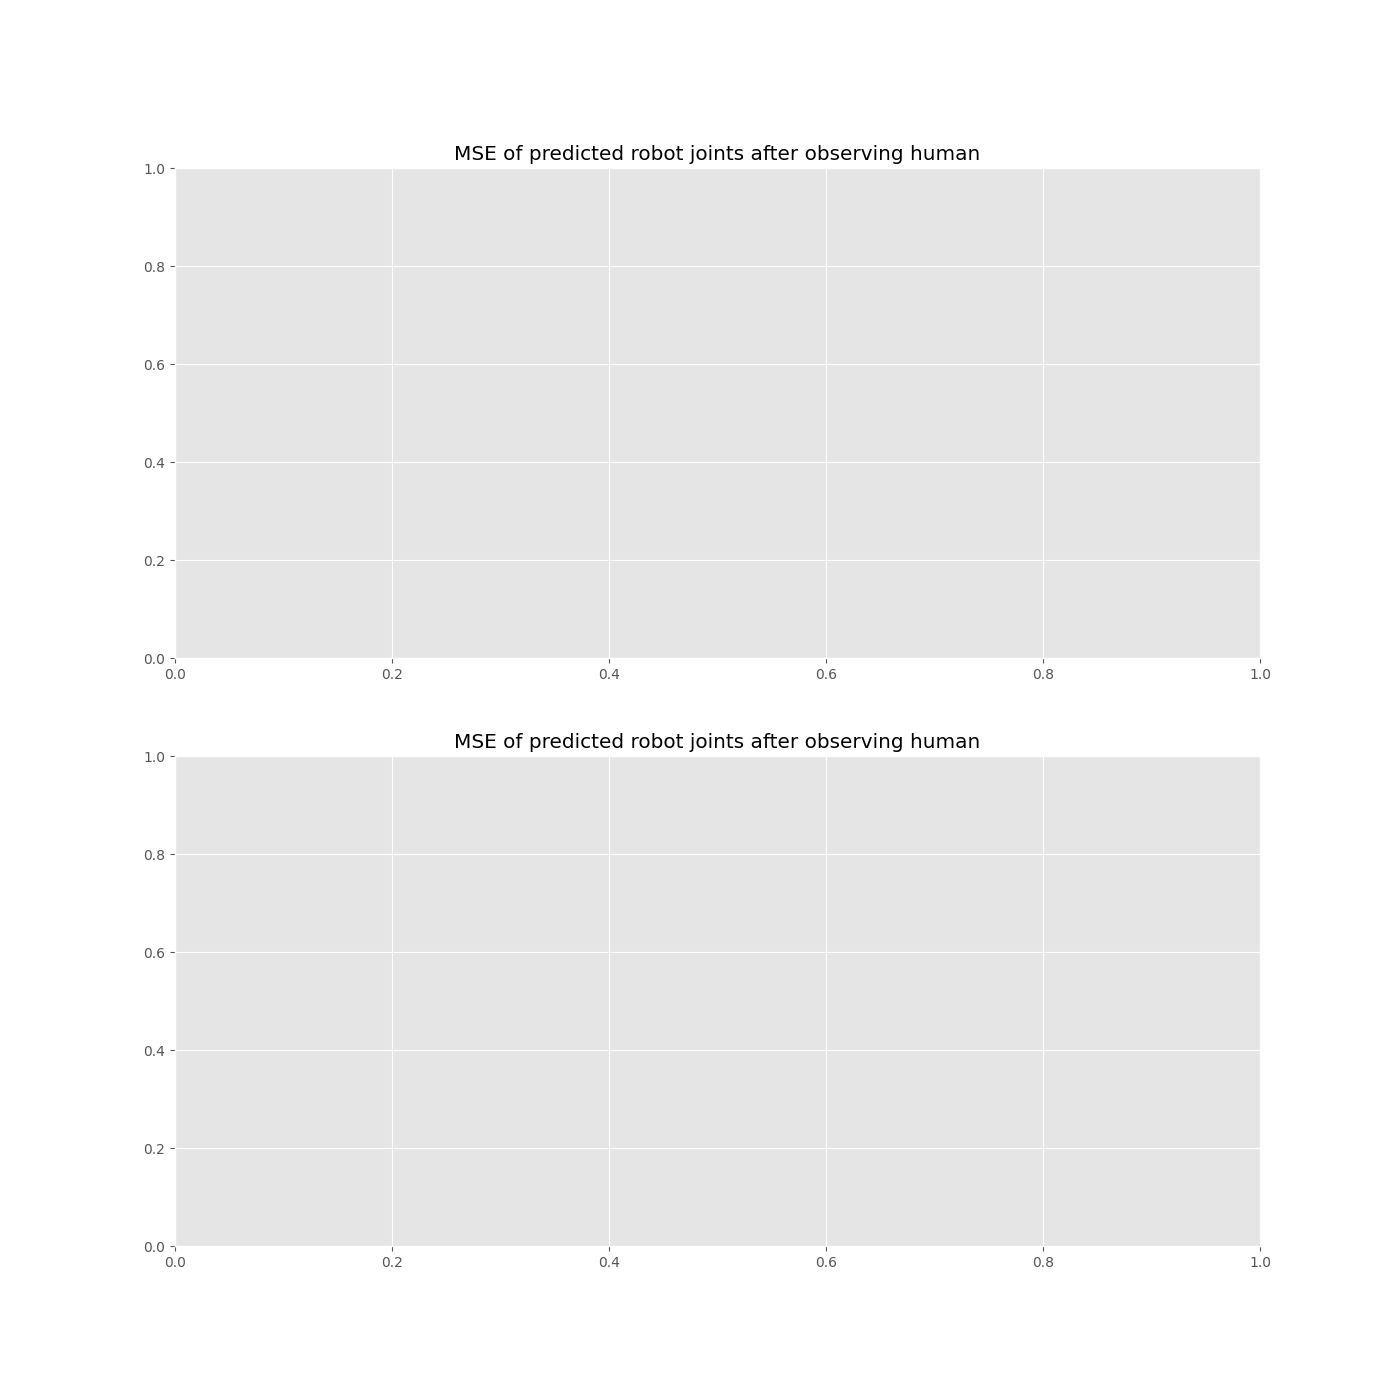

In [3]:
# p_values = np.ones((len(pred_mse), len(pred_mse)))
# models = model_types

# p_values = np.zeros((len(pred_mse), len(pred_mse)))
# for i in range(len(pred_mse)-1):
# 	for j in range(i+1,len(pred_mse)):
# 		p_values[i,j] = scipy.stats.ttest_rel(pred_mse[i], pred_mse[j]).pvalue
# 		# if p_values[i,j]>0.05:
# 		# 	print(models[i],models[j],p_values[i,j])
# 		# 	p_values[i,j] = 0.051

# s = '\t'
# for i in range(len(models)):
# 	s+= models[i]+'\t'
# s+='\n'
# for i in range(len(pred_mse)):
# 	s+= models[i]+'\t'
# 	for j in range(len(pred_mse)):
# 		if j<=i:
# 			s += '.\t'
# 		else:
# 			if p_values[i,j] < 0.01:
# 				s += '**\t'
# 			elif p_values[i,j] < 0.05:
# 				s += '*\t'
# 			else:
# 				s += 'o\t'
# 	s+='\n'
# print(s)

fig = plt.figure(figsize=(14,14))
ax_box_pred = plt.subplot(2,1,1)
# ax_box_vae = plt.subplot(2,2,2)
ax_bar_pred = plt.subplot(2,1,2)
# p_plot = plt.subplot(3,1,3)
# heatmap = p_plot.pcolor(p_values)
# p_plot.colorbar(heatmap)
# ax_bar_vae = plt.subplot(2,2,4)
k = 0
ax_box_pred.set_title('MSE of predicted robot joints after observing human')
ax_bar_pred.set_title('MSE of predicted robot joints after observing human')

# X = np.arange(len(pred_mse))
mean_pred_mse = np.array([np.mean(pred_mse[i]) for i in range(len(pred_mse))])
med_pred_mse = np.array([np.median(pred_mse[i]) for i in range(len(pred_mse))])

colors = get_cmap()(np.linspace(0.5,1,5))
labels = ['v1', 'v2.1', 'v2.2', 'v3.1', 'v3.2']
X = np.arange(5)
ax_bar_pred.bar(X[3:], mean_pred_mse[3:], color = colors[3:], width = 0.1, label=labels, edgecolor='k')#, label='100 epochs')
# ax_bar_pred.bar(X[1::3], mean_pred_mse[1::3], color = colors[1], width = 0.1, label=labels[1], edgecolor='k')#, label='100 epochs')
# ax_bar_pred.bar(X[2::3], mean_pred_mse[2::3], color = colors[2], width = 0.1, label=labels[2], edgecolor='k')#, label='100 epochs')
# ax_bar_pred.bar(X, med_pred_mse, color = 'm', width = 0.5, label='median')#, label='100 epochs')

ax_bar_pred.plot([X[3]-0.5, X[-1]+0.5], [mean_pred_mse[3:].min(), mean_pred_mse[3:].min()], 'k--', alpha = 0.5)#, label='100 epochs')

bars = []
min_whiskers_y = 10
max_whiskers_y = -10
for i in range(3,len(pred_mse)):
	# if i%3 == 0:
	# 	continue
	bars.append(ax_box_pred.boxplot(pred_mse[i], positions=[X[i]], showfliers=False, widths=[0.1], patch_artist = True,
		   boxprops = dict(facecolor=colors[i]), 
		   medianprops = dict(color = "black", linewidth = 1.5),
		   labels=[labels[i]]))
	if bars[-1]['caps'][1].get_ydata()[0] < min_whiskers_y:
		min_whiskers_y = bars[-1]['caps'][1].get_ydata()[0]
	if bars[-1]['caps'][1].get_ydata()[0] > max_whiskers_y:
		max_whiskers_y = bars[-1]['caps'][1].get_ydata()[0]
	
ax_box_pred.plot([X[3]-0.5, X[-1]+0.5], [med_pred_mse.min(), med_pred_mse.min()], 'k--', alpha = 0.5)#, label='100 epochs')
ax_box_pred.plot([X[3]-0.5, X[-1]+0.5], [min_whiskers_y, min_whiskers_y], 'k--', alpha = 0.5)#, label='100 epochs')

ax_bar_pred.set_ylabel('Prediction MSE')
ax_box_pred.set_ylabel('Prediction MSE')
ax_bar_pred.set_xticks(X[3:], labels[3:])#('Post. Samples\nConditioning', 'Post. Samples\nConditioning\nwith Post. Cov.', 'Cond. Samples', 'Cond. Samples\nwith Post. Cov.',))# 'Diagonalized\nCond. Samples', 'Diagonalized\nCond. Samples\nwith Post. Cov.', ))
ax_box_pred.set_xticks(X[3:], labels[3:])#('Post. Samples\nConditioning', 'Post. Samples\nConditioning\nwith Post. Cov.', 'Cond. Samples', 'Cond. Samples\nwith Post. Cov.',))# 'Diagonalized\nCond. Samples', 'Diagonalized\nCond. Samples\nwith Post. Cov.', ))


# count_j = 0
# for j in range(3,len(pred_mse)):
# 	count_k = 0
# 	for k in range(j+1,len(pred_mse)):
# 		if p_values[j,k]>=0.05:
# 			y, h, col = np.max([bars[j]['caps'][1].get_ydata()[0],bars[k]['caps'][1].get_ydata()[0]])+np.max([count_j,count_k])*0.0025+0.005, 0.0025, 'k'
# 			if p_values[j,k]<0.05:
# 				ax_box_pred.plot([X[j], X[j], X[k], X[k]], [y, y+h, y+h, y], lw=1.5, c=col, linestyle='-')
# 				# ax_box_pred.text((X[k]+X[j])*.5, y+h, "*", ha='center', va='bottom', color=col,fontweight='bold',fontsize=20)
# 			else:
# 				ax_box_pred.plot([X[j], X[j], X[k], X[k]], [y, y+h, y+h, y], lw=1.5, c=col, linestyle='--')
# 				# ax_box_pred.text((X[k]+X[j])*.5, y+h, "o", ha='center', va='bottom', color=col,fontweight='bold',fontsize=20)
# 			count_k += 1
# 			count_j += 1

plt.show()


# "MILD" - Standard VAE Loss
$$\mathcal{L}_t = \mathbb{E}_{q_h}\log p(\boldsymbol{x}^h_t|\boldsymbol{z}^h_t) + \mathbb{E}_{q_r}\log p(\boldsymbol{x}^r_t|\boldsymbol{z}^r_t) + \mathcal{L}_{KL}$$

The following  use an additional conditional reconstruction term $\mathcal{L}_{cond} = \mathbb{E}\log p(\boldsymbol{x}^r_t|\boldsymbol{\hat{z}}^r_t)$
They mainly differ in how the expectation is calculated w.r.t $\boldsymbol{\hat{z}}^r_t$, specifically which distribution is used for Monte Carlo sampling. We then calculate the reconstruction loss for the sampled points.

# Cond. Samples
- Samples are drawn from the HMM conditional distribution.
- Calculate the posterior distribution $\boldsymbol{\mu}_{\boldsymbol{z}}(\boldsymbol{x}^h_t),\boldsymbol{\Sigma}_{\boldsymbol{z}}(\boldsymbol{x}^h_t) = q(\boldsymbol{z}^h_t|\boldsymbol{x}^h_t)$
- Calculate the conditional distribution using the posterior mean and sample $\boldsymbol{\hat{z}}^r_t$ from this.
$$
  \boldsymbol{K}_i = {\color{orange}\boldsymbol{\Sigma}^{rh}_i}({\color{orange}\boldsymbol{\Sigma}^{hh}_i})^{-1} \\
    \boldsymbol{\hat{\mu}}^r_i = {\color{orange}\boldsymbol{\mu}^{r}_i} + \boldsymbol{K}_i({\color{orange}\boldsymbol{\mu}^h_i} - {\color{magenta}\boldsymbol{\mu}_{\boldsymbol{z}}(\boldsymbol{x}^h_t)})\\
    \boldsymbol{\hat{\Sigma}}^r_i = {\color{orange}\boldsymbol{\Sigma}^{rr}_i} - \boldsymbol{K}_i{\color{orange}\boldsymbol{\Sigma}^{hr}_i} + \boldsymbol{\hat{\mu}}^r_i(\boldsymbol{\hat{\mu}}^r_i)^T\\
    \boldsymbol{\hat{\mu}}^r_t = \sum_{i=1}^N {\color{orange}\bar \alpha_i^t} \hspace{0.2em} \boldsymbol{\hat{\mu}}^r_i\\
    \boldsymbol{\hat{\Sigma}}^r_t = \left[\sum_{i=1}^N {\color{orange}\bar \alpha_i^t} \hspace{0.2em} \boldsymbol{\hat{\Sigma}}^r_i\right]  - \boldsymbol{\hat{\mu}}^r_t(\boldsymbol{\hat{\mu}}^r_t)^T\\
    p(\boldsymbol{z}_t^r | q_t^h) = \mathcal{N}(\boldsymbol{z}^r_t;\boldsymbol{\hat{\mu}}^r_t, \boldsymbol{\hat{\Sigma}}^r_t) \\
    \mathcal{L}_{cond} = \mathbb{E}_{\boldsymbol{\hat{z}}^r_t \sim p(\boldsymbol{z}_t^r | q_t^h)}\log p(\boldsymbol{x}^r_t|\boldsymbol{\hat{z}}^r_t)
$$

# Diagonalized Cond. Samples
Same as above but using the diagonalized form of the conditional distribution covariance
$$p(\boldsymbol{z}_t^r | q_t^h) = \mathcal{N}(\boldsymbol{z}^r_t;\boldsymbol{\hat{\mu}}^r_t, diag(\boldsymbol{\hat{\Sigma}}^r_t))$$

# Posterior Sample Conditioning 
$$
{\color{magenta}\boldsymbol{z}^h_t} \sim q(\boldsymbol{z}^h_t|\boldsymbol{x}^h_t)\\
\boldsymbol{K}_i = {\color{orange}\boldsymbol{\Sigma}^{rh}_i}({\color{orange}\boldsymbol{\Sigma}^{hh}_i})^{-1} \\
    \boldsymbol{\hat{z}}^r_t = \sum_{k=1}^K {\color{orange}\bar \alpha_i^t} [{\color{orange}\boldsymbol{\mu}^{r}_i} + \boldsymbol{K}_i({\color{orange}\boldsymbol{\mu}^h_i} - {\color{magenta}\boldsymbol{z}^h_t})]\\
    \mathcal{L}_{cond} = \mathbb{E}_{\boldsymbol{\hat{z}}^r_t| \boldsymbol{z}^h_t \sim q(\boldsymbol{z}^h_t | \boldsymbol{x}^h_t)}\log p(\boldsymbol{x}^r_t|\boldsymbol{\hat{z}}^r_t)
$$


# "with Post. Cov."
This implies Conditioning with the Posterior Covariance
$$\boldsymbol{K}_i = {\color{orange}\boldsymbol{\Sigma}^{rh}_i}({\color{orange}\boldsymbol{\Sigma}^{hh}_i} + {\color{magenta}\boldsymbol{\Sigma}_{\boldsymbol{z}}(\boldsymbol{x}^h_t)})^{-1}$$